In [4]:
import numpy as np 
from PIL import Image
from scipy.misc import imread, imshow
from scipy import ndimage
import matplotlib.pyplot as plt 

def kNearest(imArr, k, posX, posY):

	# X_int = int(posX)
	# Y_int = int(posY)
	sum = 0
	values = []
	out = []
	for c in range(max(0, int(posX)), min(imArr.shape[0], int(posX+k))):
		for r in range(max(0, int(posY-k)), min(imArr.shape[1], int(posY+k))):
			difference_x = posX - c
			difference_y = posY - r
			sqr = float(difference_x**2 + difference_y**2)
			# print(sqr)
			values.append(imArr[c,r]) # яркость в точке
			# print(values)
			out.append(sqr) # расстояния до точек
			# print(out)

	values = np.array(values)
	out = np.array(out)
	# print(values, out)
	temp = np.vstack([out, values])
	out = np.argsort(out)
	# print(out)
	
	i = 0
	while i < k:
		# if out[i] == 0. :
		# 	while i < k:
		# 		sum += temp[1, i+1]
		# 		i += i
		# 	break

		# else:
		sum += temp[1, i]
		# print(sum)
		i += 1
	# print(out)
	# out = np.partition(out, int(k+1))
	# out = np.sort(out)
	# print(out)
	# print(keys)
	# print(d)

	result = sum/k
	return result



path = input("Path to picture: ")
img = Image.open(path, 'r')
img = img.convert('L')
imArr = np.asarray(img)
pix = img.load()

# def to_list(tpl):
# 	lst = list(tpl)
# 	return lst

# (width, height) = img.size
# coord_list = [(x, y) for x in range(width) for y in range(height)]
# lst = list(map(to_list, coord_list))
# coord_array = np.asanyarray(lst)
# coord_array = int(coord_array)

newShape = list(map(int, [imArr.shape[0]*2, imArr.shape[1]*2]))
resultImg = np.empty(newShape, dtype = np.uint8)
rowScale = float(imArr.shape[0]) / float(resultImg.shape[0])
colScale = float(imArr.shape[1]) / float(resultImg.shape[1])

def resize():
    k = input("Enter k: ")
    k = int(k)
    for r in range(resultImg.shape[0]):
        for c in range(resultImg.shape[1]):
            old_r = r * rowScale 
            old_c = c * colScale
            resultImg[c, r] = kNearest(imArr, k, old_c, old_r)
 
    plt.imshow(np.uint8(resultImg), cmap = 'gray')
# plt.show()

Path to picture: 5.jpg


Enter k: 2


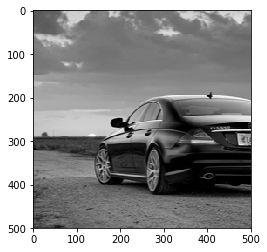

In [5]:
resize()

Enter k: 3


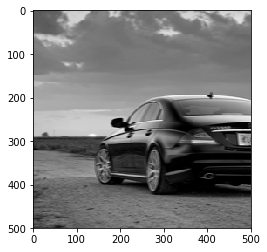

In [6]:
resize()